# Import Packages 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


# Read CSV file

In [3]:
df = pd.read_csv(r"D:\Data Analysis\CareerFoundaryCourse\New York Citi Bikes_Raw Data_CSV.csv")

In [4]:
print(df.head())

         Start Time         Stop Time  Start Station ID Start Station Name  \
0  01-01-2017 00:38  01-01-2017 01:03              3194    McGinley Square   
1  01-01-2017 01:47  01-01-2017 01:58              3183     Exchange Place   
2  01-01-2017 01:47  01-01-2017 01:58              3183     Exchange Place   
3  01-01-2017 01:56  01-01-2017 02:00              3186      Grove St PATH   
4  01-01-2017 02:12  01-01-2017 02:23              3270    Jersey & 6th St   

   End Station ID     End Station Name  Bike ID   User Type  Birth Year  Age  \
0            3271  Danforth Light Rail    24668  Subscriber        1961   60   
1            3203        Hamilton Park    26167  Subscriber        1993   28   
2            3203        Hamilton Park    26167  Subscriber        1993   28   
3            3270      Jersey & 6th St    24604  Subscriber        1970   51   
4            3206              Hilltop    24641  Subscriber        1978   43   

  Age Groups  Trip Duration Trip_Duration_in_min  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Start Time            20400 non-null  object
 1   Stop Time             20400 non-null  object
 2   Start Station ID      20400 non-null  int64 
 3   Start Station Name    20400 non-null  object
 4   End Station ID        20400 non-null  int64 
 5   End Station Name      20399 non-null  object
 6   Bike ID               20400 non-null  int64 
 7   User Type             20400 non-null  object
 8   Birth Year            20400 non-null  int64 
 9   Age                   20400 non-null  int64 
 10  Age Groups            20400 non-null  object
 11  Trip Duration         20400 non-null  int64 
 12  Trip_Duration_in_min  20400 non-null  object
 13  Month                 20400 non-null  int64 
 14  Season                20400 non-null  object
 15  Temperature           20400 non-null

In [6]:
df.shape

(20400, 17)

In [7]:
df.describe()

,Start Station ID,End Station ID,Bike ID,Birth Year,Age,Trip Duration,Month,Temperature
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,3215.863627,3211.439510,25301.732647,1979.319706,41.680294,563.842745,2.221569,14.897647
std,34.563120,82.707121,989.974295,10.091335,10.091335,4011.550663,0.822335,2.398100
min,3183.000000,152.000000,15084.000000,1931.000000,22.000000,61.000000,1.000000,9.000000
25%,3186.000000,3186.000000,24523.000000,1974.000000,35.000000,221.000000,1.000000,13.000000
50%,3203.000000,3202.000000,24679.000000,1982.000000,39.000000,311.000000,2.000000,15.000000
75%,3267.000000,3220.000000,26220.000000,1986.000000,47.000000,514.000000,3.000000,17.000000
max,3281.000000,3442.000000,29296.000000,1999.000000,90.000000,390893.000000,3.000000,19.000000


In [8]:
print(df.tail())

             Start Time         Stop Time  Start Station ID  \
20395  31-03-2017 21:06  31-03-2017 21:10              3186   
20396  31-03-2017 21:13  31-03-2017 21:18              3195   
20397  31-03-2017 21:13  31-03-2017 21:18              3195   
20398  31-03-2017 21:26  31-03-2017 21:30              3195   
20399  31-03-2017 23:20  31-03-2017 23:30              3272   

      Start Station Name  End Station ID End Station Name  Bike ID  \
20395      Grove St PATH            3203    Hamilton Park    24608   
20396            Sip Ave            3194  McGinley Square    29219   
20397            Sip Ave            3194  McGinley Square    29219   
20398            Sip Ave            3201           Dey St    29276   
20399       Jersey & 3rd            3268   Lafayette Park    24398   

        User Type  Birth Year  Age Age Groups  Trip Duration  \
20395  Subscriber        1968   53      45-54            244   
20396  Subscriber        1956   65      65-74            264   
20397  S

In [17]:
#df["Age Groups"].value_counts()
#df["Season"].value_counts()
#df["User Type"].value_counts()

Temperature
16    3703
14    3159
13    2387
12    2358
15    2069
18    1977
17    1781
19    1550
11     705
10     609
9      102
Name: count, dtype: int64

# Methods used analyze table details

In [7]:
#df.columns
df.rename(columns={"Start Time":"Start_Time", "Stop Time":"Stop_Time", "Start Station ID":"Start_Station_ID", "Start Station Name":"Start_Station_Name",
"End Station ID":"End_Station_ID", "End Station Name": "End_Station_Name", "Bike ID": "Bike_ID", "User Type":"User_Type", "Birth Year":"Birth_Year", "Age Groups":"Age_Groups", 
                   "Trip Duration":"Trip_Duration"}, inplace = True)

In [11]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], format='%d-%m-%Y %H:%M')
df["Stop_Time"] = pd.to_datetime(df["Stop_Time"], format='%d-%m-%Y %H:%M')
print(df["Start_Time"].dtypes)
print(df["Stop_Time"].dtypes)

datetime64[ns]
datetime64[ns]


In [ ]:
# Start_Time : [ Not Null : 20400, sum of value_counts : 20400, dtype: Object]

#df["Start_Time"].value_counts().sum()

#df[df["Start_Time"].max() != 0]

# Find and Remove duplicate values

In [8]:
### Check the duplicate all columns ###
duplicates = df.duplicated().sum()
print(duplicates)

### Check the duplicate specific columns ###
duplicate_col = df['End_Station_Name'].duplicated().sum()
print(duplicate_col)

3555
20343


In [25]:
### Drop Duplicate ###
df.drop_duplicates(inplace=True)
df.duplicated()

0        False
1        False
3        False
4        False
5        False
         ...  
20393    False
20394    False
20396    False
20398    False
20399    False
Length: 16844, dtype: bool

# IDENTIFY AND REMOVE MISSING DATA POINTS 

In [9]:
### IDENTIFY AND REMOVE MISSING DATA POINTS ###
print(df.isnull().sum())

### Drop the null values ###
df.dropna(inplace=True)

Start_Time              0
Stop_Time               0
Start_Station_ID        0
Start_Station_Name      0
End_Station_ID          0
End_Station_Name        1
Bike_ID                 0
User_Type               0
Birth_Year              0
Age                     0
Age_Groups              0
Trip_Duration           0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64


### Data Visualization

Start_Station_Name
Grove St PATH       2544
Exchange Place      1484
Sip Ave             1325
Hamilton Park       1305
Morris Canal         854
Newport PATH         802
City Hall            685
Van Vorst Park       634
Newark Ave           622
Warren St            591
Brunswick St         581
Dixon Mills          567
Marin Light Rail     555
Jersey & 6th St      554
Jersey & 3rd         553
Paulus Hook          516
Brunswick & 6th      481
Monmouth and 6th     473
Essex Light Rail     459
McGinley Square      459
Name: count, dtype: int64


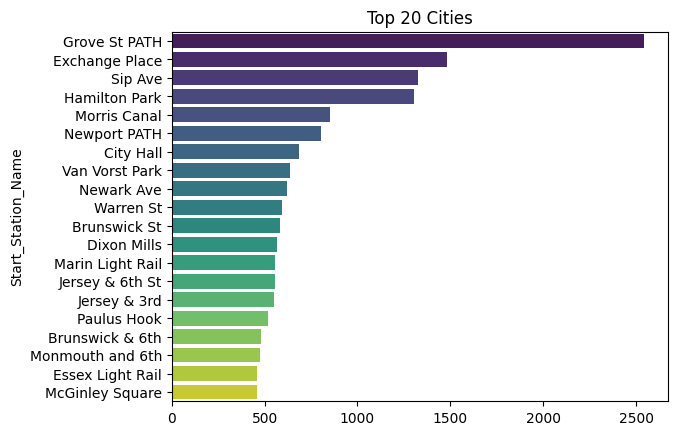

In [10]:
# Task : 1  Create a bar chart for the top 20 NY Citi Bike pick-up locations

withVal = df["Start_Station_Name"].value_counts()


df_top20 = withVal.head(20)
print(df_top20)
sns.barplot(x=df_top20.values, y=df_top20.index, palette='viridis')
plt.title("Top 20 Cities")
plt.show()

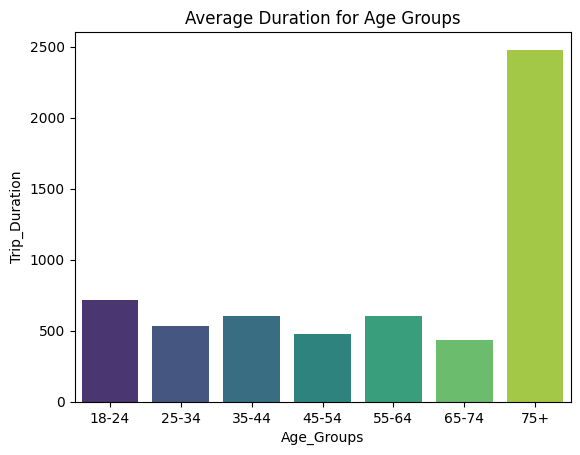

In [11]:
# Task 2: Create a column chart showing average trip duration across different age groups
ageGroup_avg = df.groupby("Age_Groups").Trip_Duration.mean().reset_index()
ageGroup_avg = ageGroup_avg.tail(10)

sns.barplot(data = ageGroup_avg, x = "Age_Groups", y = "Trip_Duration", palette="viridis")
plt.title("Average Duration for Age Groups")
plt.show()

C:\Users\sivar\AppData\Local\Temp\ipykernel_31432\541281697.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = bikes_ageGroup, x="Age_Groups", y="Bike_ID", palette = "viridis" )


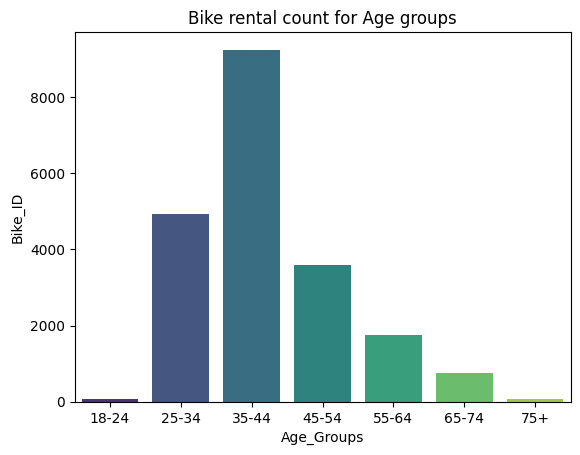

In [67]:
# Task 3: Create a bar chart for number of bike rentals per age group
bikes_ageGroup = df.groupby("Age_Groups").Bike_ID.count().reset_index()
bikes_ageGroup = bikes_ageGroup.head(10)

sns.barplot(data = bikes_ageGroup, x="Age_Groups", y="Bike_ID", palette = "viridis" )
plt.title("Bike rental count for Age groups")
plt.show()


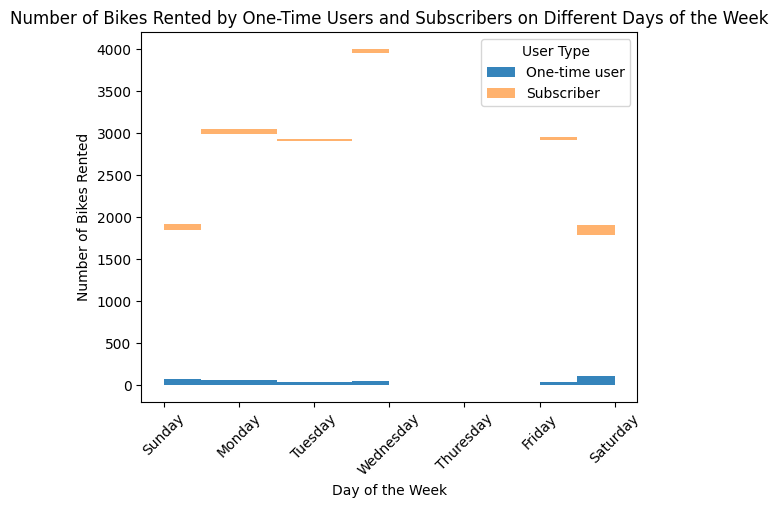

In [12]:
# Task 4: Produce a stacked stepped area chart for weekday and user type

df_counts_ = df.groupby(["User_Type", "Weekday"]).size().reset_index(name="count")
df_pivot = df_counts_.pivot(index = "Weekday", values = "count", columns = "User_Type").fillna(0)
days_order = ["Sunday", "Monday", "Tuesday", "Wednesday","Thuresday", "Friday", "Saturday"]
df_pivot = df_pivot.reindex(days_order)
df_pivot.head()

plt.fill_between(df_pivot.index, df_pivot['One-time user'], step='mid', label='One-time user', alpha=0.9)
plt.fill_between(df_pivot.index, df_pivot['Subscriber'], df_pivot['One-time user'] + df_pivot['Subscriber'], step='mid', label='Subscriber', alpha=0.6)

plt.title('Number of Bikes Rented by One-Time Users and Subscribers on Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bikes Rented')
plt.legend(title='User Type')
plt.xticks(rotation=45)
plt.show()

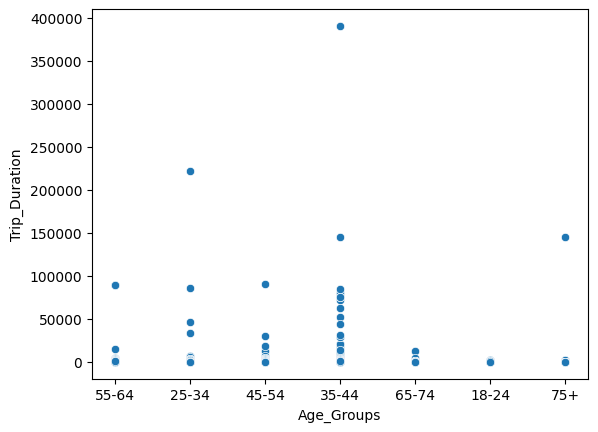

In [13]:
# Task 5: Produce scatter plots for age vs trip duration

sns.scatterplot(data=df, x="Age_Groups", y="Trip_Duration")
plt.show()
